In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from scipy.optimize import curve_fit

In [4]:
def exp_f(x,a,b,c):
    return(a*exp(-b*x+c))

In [5]:
def gauss_exp(x,x0,sig,a,A,B,C):
    return(a/(sqrt(2*pi)*sig)*exp(-(x-x0)**2/(2*sig**2))+A*exp(-B*x+C))

# 30 fok

In [7]:
deg_30=loadtxt('./30fok873s.mca',comments='#')

(20, 80)

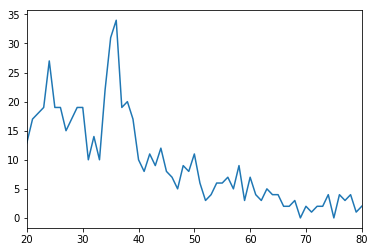

In [8]:
plot(deg_30)
xlim(20,80)

In [9]:
mtemp=linspace(20,79,60)
tvals=deg_30[20:80]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])

In [10]:
exp_opt

array([  1.42585051e-09,   3.44723786e-02,   2.42011233e+01])

(20, 90)

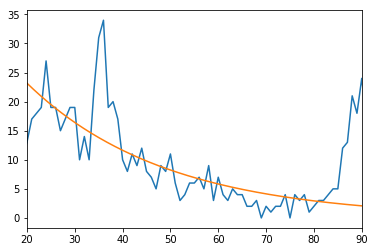

In [11]:
plot(deg_30)
mt=linspace(20,90,1000)
plot(mt,exp_f(mt,*exp_opt))
xlim(20,90)

In [12]:
values=deg_30[75:105]
mpoints=linspace(75,104,30)
err=sqrt(deg_30)
for j in range (len(err)):
    if err[j]==0:
        err[j]=1

(75, 105)

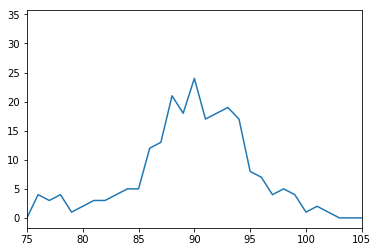

In [13]:
plot(deg_30)
xlim(75,105)

In [14]:
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt, pcov = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoints, values, p0=[90,3.5,20])

In [15]:
popt

array([  90.55428522,    3.44937944,  168.31430739])

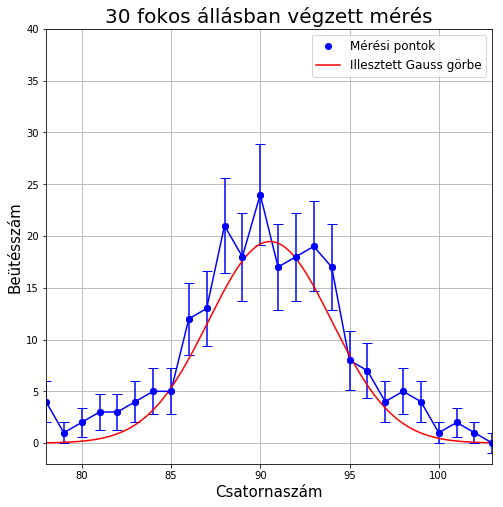

In [122]:
figsize(8,8)
plot(deg_30,'bo',label='Mérési pontok')
plot(deg_30,'b')
errorbar(mpoints,values,err[75:105],marker='o',color='b',ms=6,capsize=5,ls='')
mm=linspace(70,110,2000)
plot(mm, gauss_exp(mm, *popt,A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(78,103)
grid(True)
ylim(-2,40)
legend(fontsize=12)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('30 fokos állásban végzett mérés',fontsize=20)
savefig('./30fok.png',bbox_inches='tight')

In [17]:
props=zeros((7))
props[0]=30
props[1]=popt[0]
props[3]=popt[1]
props[5]=popt[2]
print(popt,props)

[  90.55428522    3.44937944  168.31430739] [  30.           90.55428522    0.            3.44937944    0.
  168.31430739    0.        ]


In [18]:
for i in range (3):
    temp=sqrt(pcov[i,i])
    props[2*i+2]=temp
    print(temp)

0.203899912346
0.203900164388
8.61648861105


In [19]:
props

array([  30.        ,   90.55428522,    0.20389991,    3.44937944,
          0.20390016,  168.31430739,    8.61648861])

In [20]:
d2=['Fok','mu','errmu','sigma','errsigma','A','errA']
df=pd.DataFrame(data=None, columns=d2)

In [21]:
df.loc['0']=props

In [22]:
df

,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.2039,3.449379,0.2039,168.314307,8.616489


# 40 fok

In [23]:
deg_40=loadtxt('./40fok1068.mca',comments='#')

(36, 70)

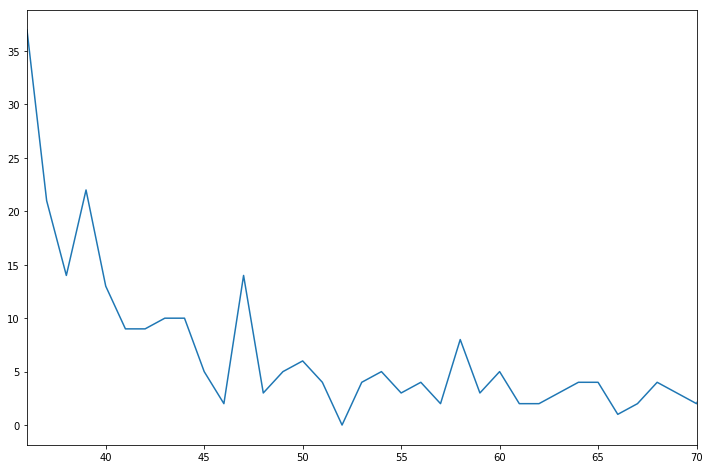

In [24]:
plot(deg_40)
xlim(36,70)

In [25]:
mtemp=linspace(36,70,34)
tvals=deg_40[36:70]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])

In [26]:
mpoint1=linspace(65,94,30)
values1=deg_40[65:95]
err1=sqrt(deg_40)
for j in range (len(err)):
    if err1[j]==0:
        err1[j]=1

(65, 95)

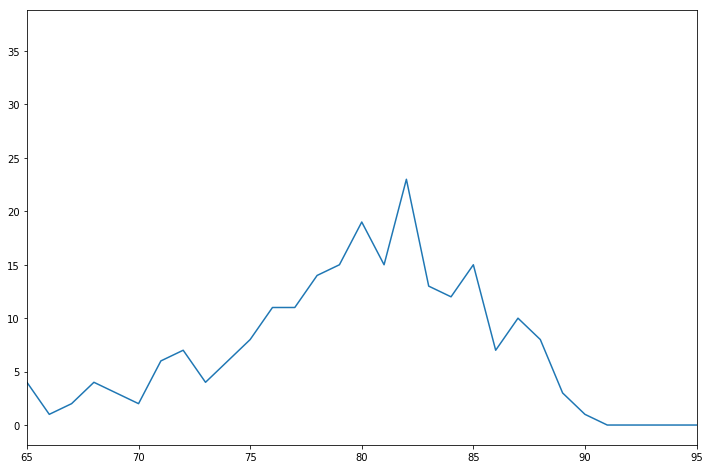

In [27]:
plot(deg_40)
xlim(65,95)

In [28]:
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt1, pcov1 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint1, values1, p0=[80,4.4,170])

In [29]:
popt1

array([  80.75656227,    4.98538205,  214.05872695])

In [30]:
for i in range (3):
    temp=sqrt(pcov1[i,i])
    print(temp)

0.329595594678
0.330556969976
12.2678234332


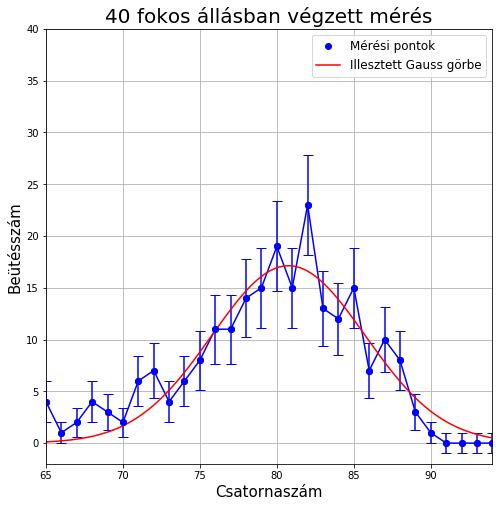

In [121]:
figsize(8,8)
plot(deg_40,'bo',label='Mérési pontok')
plot(deg_40,'b')
j=65
for i in range (30):
    errorbar(mpoint1[i],values1[i],err1[j],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(60,100,2000)
plot(mm, gauss_exp(mm, *popt1, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(65,94)
grid(True)
legend(fontsize=12)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('40 fokos állásban végzett mérés',fontsize=20)
savefig('./40fok.png',bbox_inches='tight')

In [32]:
props[0]=40
props[1]=popt1[0]
props[3]=popt1[1]
props[5]=popt1[2]
print(popt1,props)
for i in range (3):
    temp=sqrt(pcov1[i,i])
    props[2*i+2]=temp
    print(temp)

[  80.75656227    4.98538205  214.05872695] [  4.00000000e+01   8.07565623e+01   2.03899912e-01   4.98538205e+00
   2.03900164e-01   2.14058727e+02   8.61648861e+00]
0.329595594678
0.330556969976
12.2678234332


In [33]:
df.loc['1']=props

In [34]:
df

,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823


# 50 fokos

In [36]:
deg_50=loadtxt('./50fok978s.mca',comments='#')

(62, 83)

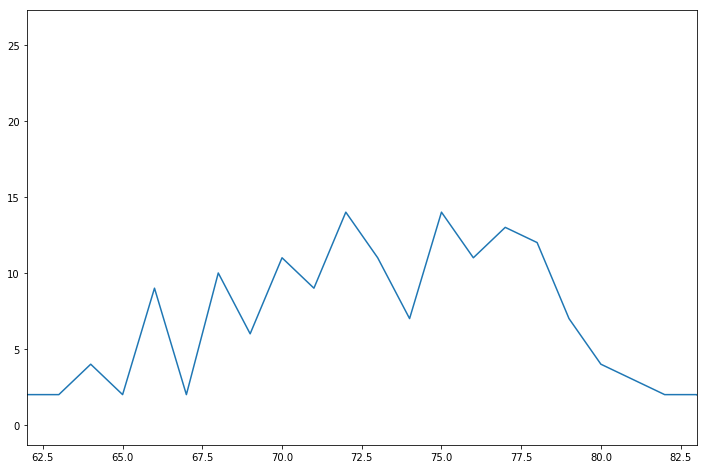

In [37]:
plot(deg_50)
xlim(62,83)

In [38]:
mtemp=linspace(36,62,26)
tvals=deg_50[36:62]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint2=linspace(55,84,30)
values2=deg_50[55:85]
err2=sqrt(deg_50)
for j in range (len(err)):
    if err2[j]==0:
        err2[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt2, pcov2 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint2, values2, p0=[73,4.4,170])

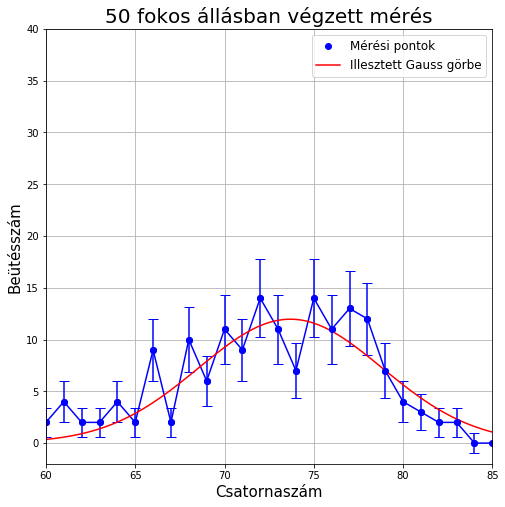

In [120]:
figsize(8,8)
plot(deg_50,'bo',label='Mérési pontok')
plot(deg_50,'b')
j=55
for i in range (30):
    errorbar(mpoint2[i],values2[i],err2[j],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(55,85,2000)
plot(mm, gauss_exp(mm, *popt2, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(60,85)
grid(True)
legend(fontsize=12)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('50 fokos állásban végzett mérés',fontsize=20)
savefig('./50fok.png',bbox_inches='tight')

In [40]:
props[0]=50
props[1]=popt2[0]
props[3]=popt2[1]
props[5]=popt2[2]
print(popt2,props)
for i in range (3):
    temp=sqrt(pcov2[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['2']=props
df

[  73.68853246    5.14170822  154.21289494] [  50.           73.68853246    0.32959559    5.14170822    0.33055697
  154.21289494   12.26782343]
0.490253564029
0.504718488491
12.8605788426


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579


# 60 fokos

In [41]:
deg_60=loadtxt('./60fok1000s.mca',comments='#')

(52, 75)

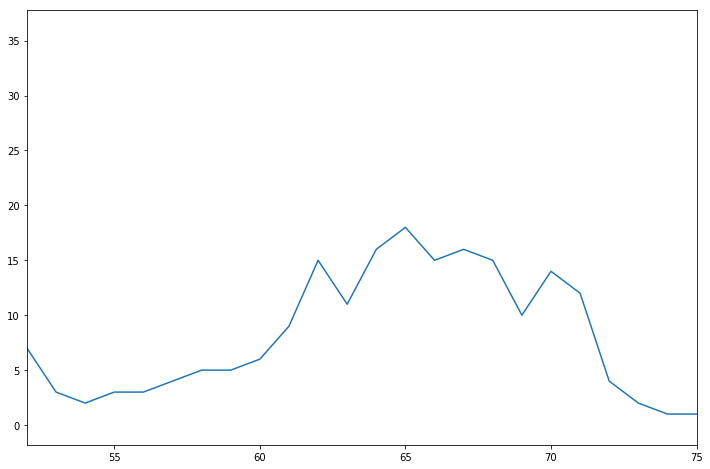

In [42]:
plot(deg_60)
xlim(52,75)

In [43]:
mtemp=linspace(37,51,15)
tvals=deg_60[37:52]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint3=linspace(50,84,35)
values3=deg_60[50:85]
err3=sqrt(deg_60)
for j in range (len(err3)):
    if err3[j]==0:
        err3[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt3, pcov3 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint3, values3, p0=[66,4.4,170])

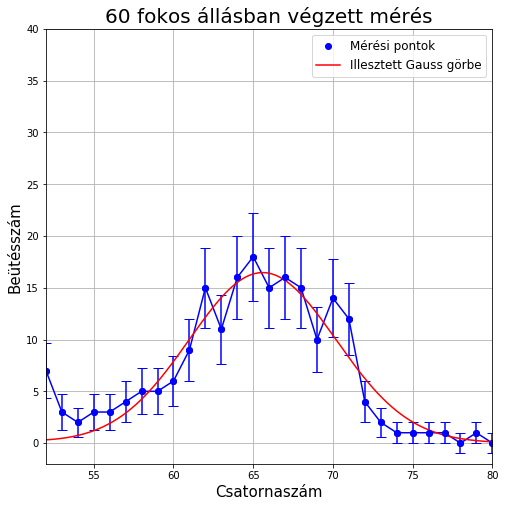

In [111]:
figsize(8,8)
plot(deg_60,'bo',label='Mérési pontok')
plot(deg_60,'b')
j=50

for i in range (35):
    errorbar(mpoint3[i],values3[i],err3[j],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(50,85,2000)
plot(mm, gauss_exp(mm, *popt3, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(52,80)
grid(True)
legend(fontsize=12)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('60 fokos állásban végzett mérés',fontsize=20)
savefig('./60fok.png',bbox_inches='tight')

In [45]:
props[0]=60
props[1]=popt3[0]
props[3]=popt3[1]
props[5]=popt3[2]
print(popt3,props)
for i in range (3):
    temp=sqrt(pcov3[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['3']=props
df

[  65.58937489    4.60311181  190.00430945] [  60.           65.58937489    0.49025356    4.60311181    0.50471849
  190.00430945   12.86057884]
0.287615570273
0.287631137186
10.2817382973


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738


# 70 fokos

In [46]:
deg_70=loadtxt('./70fok700s.mca',comments='#')

(48, 70)

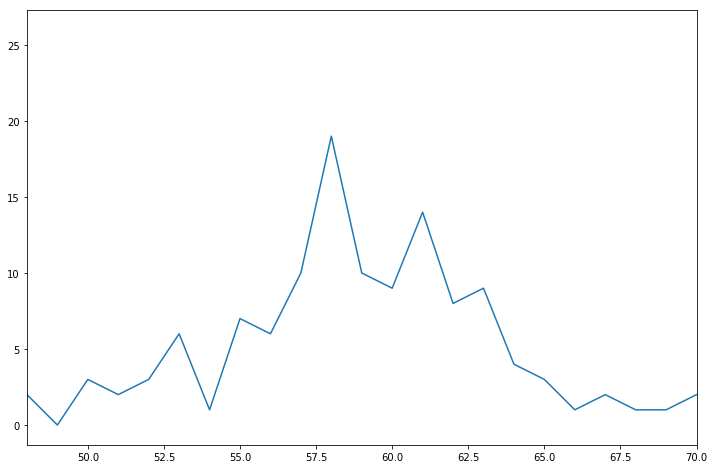

In [47]:
plot(deg_70)
xlim(48,70)

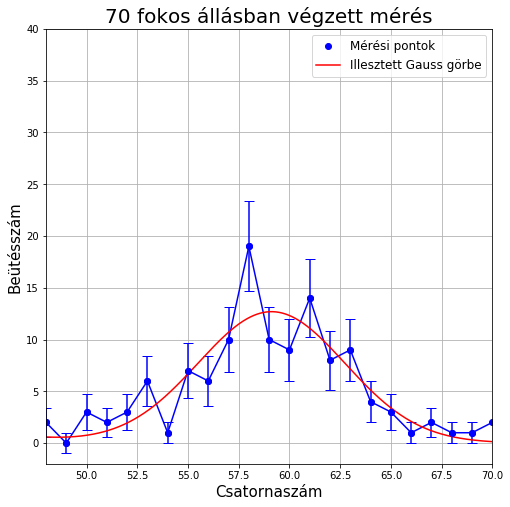

In [110]:
mtemp=linspace(38,49,12)
tvals=deg_70[38:50]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint4=linspace(45,69,25)
values4=deg_70[45:70]
err4=sqrt(deg_70)
for j in range (len(err4)):
    if err4[j]==0:
        err4[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt4, pcov4 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint4, values4, p0=[59,4.4,170])

figsize(8,8)
plot(deg_70,'bo',label='Mérési pontok')
plot(deg_70,'b')
j=45

for i in range (25):
    errorbar(mpoint4[i],values4[i],err4[j],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(40,85,2000)
plot(mm, gauss_exp(mm, *popt4, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(48,70)
grid(True)
legend(fontsize=12)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('70 fokos állásban végzett mérés',fontsize=20)
savefig('./70fok.png',bbox_inches='tight')

In [49]:
props[0]=70
props[1]=popt4[0]
props[3]=popt4[1]
props[5]=popt4[2]
print(popt4,props)
for i in range (3):
    temp=sqrt(pcov4[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['4']=props
df

[  59.11818743    3.62323915  115.22315429] [  70.           59.11818743    0.28761557    3.62323915    0.28763114
  115.22315429   10.2817383 ]
0.380996604097
0.381606140887
10.4983747879


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738
4,70.0,59.118187,0.380997,3.623239,0.381606,115.223154,10.498375


# 80 fokos

(40, 70)

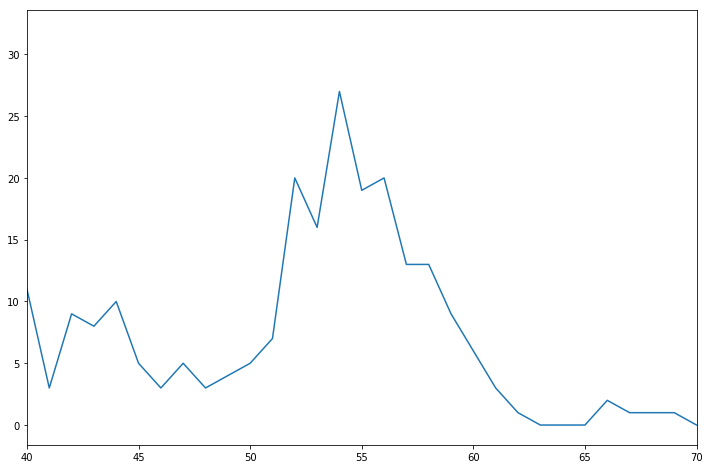

In [50]:
deg_80=loadtxt('./80fok1009.mca',comments='#')
plot(deg_80)
xlim(40,70)

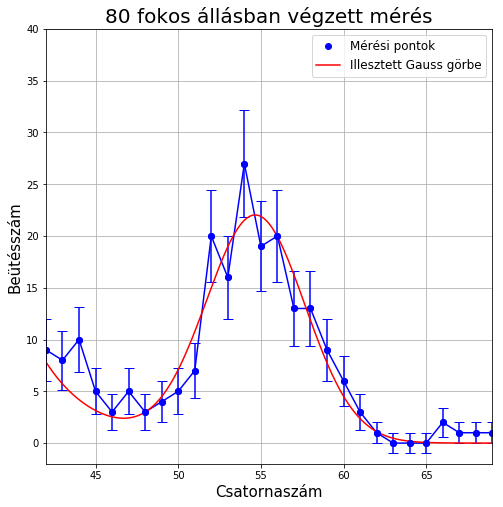

In [109]:
mtemp=linspace(38,49,12)
tvals=deg_80[38:50]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint5=linspace(40,69,30)
values5=deg_80[40:70]
err5=sqrt(deg_80)
for j in range (len(err5)):
    if err5[j]==0:
        err5[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt5, pcov5 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint5, values5, p0=[55,4.4,170])

figsize(8,8)
plot(deg_80,'b')
plot(deg_80,'bo',label='Mérési pontok')
j=40

for i in range (30):
    errorbar(mpoint5[i],values5[i],err5[j],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(30,85,2000)
plot(mm, gauss_exp(mm, *popt5, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(42,69)
grid(True)
legend(fontsize=12,loc=1)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('80 fokos állásban végzett mérés',fontsize=20)
savefig('./80fok.png',bbox_inches='tight')

In [53]:
props[0]=80
props[1]=popt5[0]
props[3]=popt5[1]
props[5]=popt5[2]
print(popt5,props)
for i in range (3):
    temp=sqrt(pcov5[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['5']=props
df

[  54.6735879     2.99326933  164.25170618] [  80.           54.6735879     0.24942284    2.99326933    0.24942284
  164.25170618   11.85324798]
0.249422841594
0.249422844914
11.8532479812


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738
4,70.0,59.118187,0.380997,3.623239,0.381606,115.223154,10.498375
5,80.0,54.673588,0.249423,2.993269,0.249423,164.251706,11.853248


# 90 fokos

(37, 60)

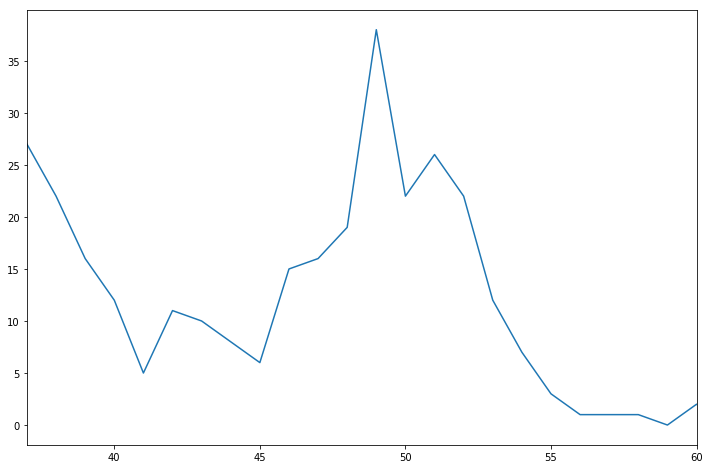

In [59]:
deg_90=loadtxt('./90fok1228.mca',comments='#')
plot(deg_90)
xlim(37,60)

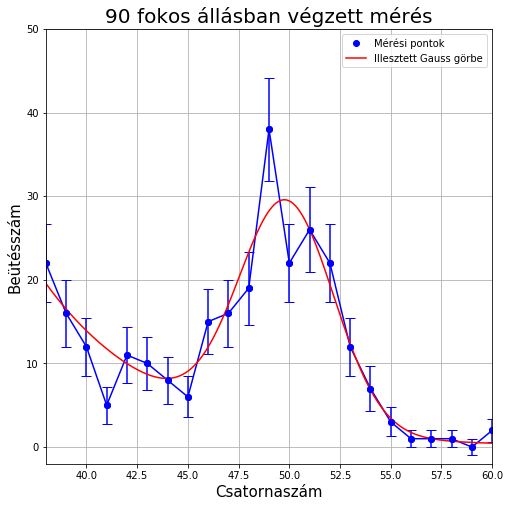

In [124]:
mtemp=linspace(35,45,11)
tvals=deg_90[35:46]
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint6=linspace(37,60,24)
values6=deg_90[37:61]
err6=sqrt(deg_90)
for j in range (len(err6)):
    if err6[j]==0:
        err6[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt6, pcov6 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint6, values6, p0=[50,4.4,170])

figsize(8,8)
plot(deg_90,'bo',label='Mérési pontok')
plot(deg_90,'b')
j=mpoint6[0]

for i in range (24):
    errorbar(mpoint6[i],values6[i],err6[int(j)],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(30,85,2000)
plot(mm, gauss_exp(mm, *popt6, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(38,60)
grid(True)
legend()
ylim(-2,50)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('90 fokos állásban végzett mérés',fontsize=20)
savefig('./90fok.png',bbox_inches='tight')

In [69]:
props[0]=90
props[1]=popt6[0]
props[3]=popt6[1]
props[5]=popt6[2]
print(popt6,props)
for i in range (3):
    temp=sqrt(pcov6[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['6']=props
df

[  49.85457293    2.21545863  143.30454582] [  90.           49.85457293    0.24860806    2.21545863    0.24860807
  143.30454582   13.92625006]
0.248608061168
0.248608068507
13.9262500569


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738
4,70.0,59.118187,0.380997,3.623239,0.381606,115.223154,10.498375
5,80.0,54.673588,0.249423,2.993269,0.249423,164.251706,11.853248
6,90.0,49.854573,0.248608,2.215459,0.248608,143.304546,13.926250


# 100 fokos

(20, 60)

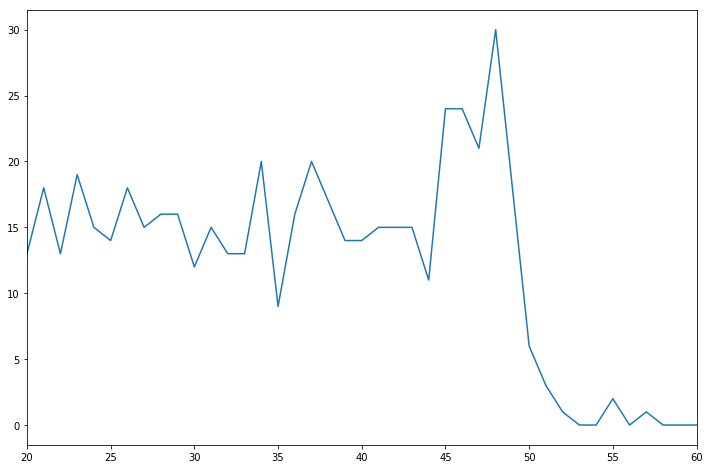

In [74]:
deg_100=loadtxt('./100fok1044.mca',comments='#')
plot(deg_100)
xlim(20,60)

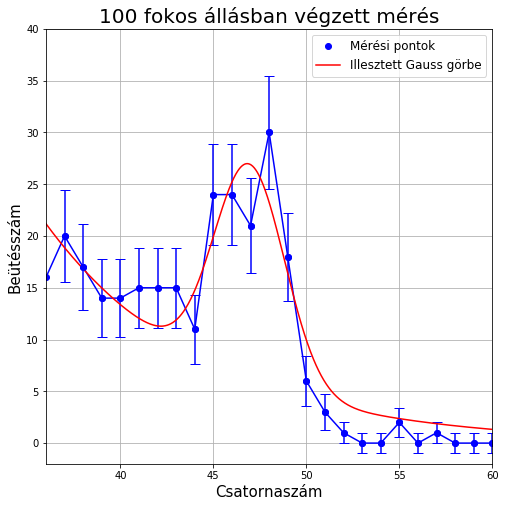

In [132]:
mtemp=append(linspace(36,43,8),linspace(51,70,20))
tvals=append(deg_100[36:44],deg_100[51:71])
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint7=linspace(37,60,24)
values7=deg_100[37:61]
err7=sqrt(deg_100)
for j in range (len(err7)):
    if err7[j]==0:
        err7[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt7, pcov7 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint7, values7, p0=[48,4.4,170])

figsize(8,8)
plot(deg_100,'bo',label='Mérési pontok')
plot(deg_100,'b')
j=mpoint7[0]

for i in range (24):
    errorbar(mpoint7[i],values7[i],err7[int(j)],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(30,85,2000)
plot(mm, gauss_exp(mm, *popt7, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(36,60)
grid(True)
legend(fontsize=12)
ylim(-2,40)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('100 fokos állásban végzett mérés',fontsize=20)
savefig('./100fok.png',bbox_inches='tight')

In [133]:
props[0]=100
props[1]=popt7[0]
props[3]=popt7[1]
props[5]=popt7[2]
print(popt7,props)
for i in range (3):
    temp=sqrt(pcov7[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['7']=props
df

[ 46.94128387   1.90203165  99.92762275] [ 100.           46.94128387    0.24860806    1.90203165    0.24860807
   99.92762275   13.92625006]
0.221661227339
0.221661230533
10.0850445388


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738
4,70.0,59.118187,0.380997,3.623239,0.381606,115.223154,10.498375
5,80.0,54.673588,0.249423,2.993269,0.249423,164.251706,11.853248
6,90.0,49.854573,0.248608,2.215459,0.248608,143.304546,13.926250
7,100.0,46.941284,0.221661,1.902032,0.221661,99.927623,10.085045


# 110 fokos

(20, 60)

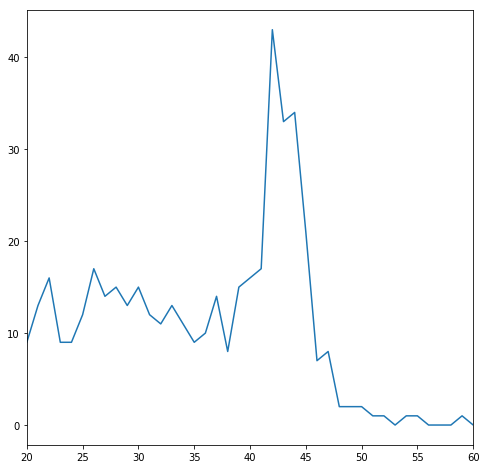

In [135]:
deg_110=loadtxt('./110fok963.mca',comments='#')
plot(deg_110)
xlim(20,60)

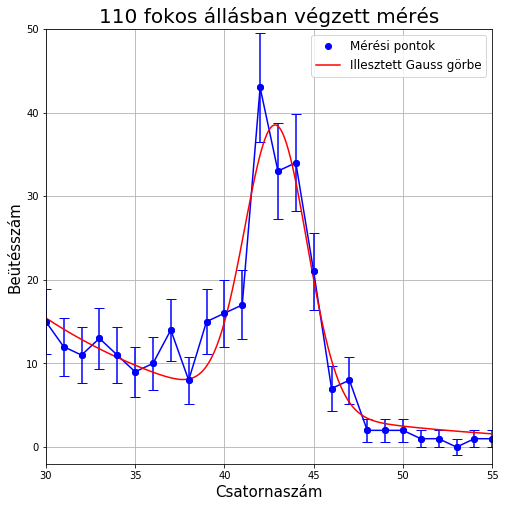

In [140]:
mtemp=append(linspace(30,38,9),linspace(47,70,24))
tvals=append(deg_110[30:39],deg_110[47:71])
exp_opt, exp_cov = curve_fit(exp_f, mtemp, tvals, [10,0.1,50,])
mpoint8=linspace(30,60,31)
values8=deg_110[30:61]
err8=sqrt(deg_110)
for j in range (len(err8)):
    if err8[j]==0:
        err8[j]=1
A=exp_opt[0]
B=exp_opt[1]
C=exp_opt[2]
popt8, pcov8 = curve_fit(lambda x, x0, sig, a : gauss_exp(x,x0,sig,a,A,B,C), mpoint8, values8, p0=[42,4.4,170])

figsize(8,8)
plot(deg_110,'bo',label='Mérési pontok')
plot(deg_110,'b')
j=mpoint8[0]

for i in range (31):
    errorbar(mpoint8[i],values8[i],err8[int(j)],marker='o',color='b',ms=6,capsize=5,ls='')
    j+=1
mm=linspace(30,85,2000)
plot(mm, gauss_exp(mm, *popt8, A,B,C),'r-',label='Illesztett Gauss görbe')
xlim(30,55)
grid(True)
legend(fontsize=12)
ylim(-2,50)
xlabel('Csatornaszám',fontsize=15)
ylabel('Beütésszám',fontsize=15)
title('110 fokos állásban végzett mérés',fontsize=20)
savefig('./110fok.png',bbox_inches='tight')

In [142]:
props[0]=110
props[1]=popt8[0]
props[3]=popt8[1]
props[5]=popt8[2]
print(popt8,props)
for i in range (3):
    temp=sqrt(pcov8[i,i])
    props[2*i+2]=temp
    print(temp)
df.loc['8']=props
df

[  42.87388694    1.74659808  147.67413408] [  1.10000000e+02   4.28738869e+01   1.28547394e-01   1.74659808e+00
   1.28547396e-01   1.47674134e+02   9.41260042e+00]
0.128547394167
0.128547395763
9.41260041755


,Fok,mu,errmu,sigma,errsigma,A,errA
0,30.0,90.554285,0.203900,3.449379,0.203900,168.314307,8.616489
1,40.0,80.756562,0.329596,4.985382,0.330557,214.058727,12.267823
2,50.0,73.688532,0.490254,5.141708,0.504718,154.212895,12.860579
3,60.0,65.589375,0.287616,4.603112,0.287631,190.004309,10.281738
4,70.0,59.118187,0.380997,3.623239,0.381606,115.223154,10.498375
5,80.0,54.673588,0.249423,2.993269,0.249423,164.251706,11.853248
6,90.0,49.854573,0.248608,2.215459,0.248608,143.304546,13.926250
7,100.0,46.941284,0.221661,1.902032,0.221661,99.927623,10.085045
8,110.0,42.873887,0.128547,1.746598,0.128547,147.674134,9.412600


In [143]:
df.to_csv('./Illesztési_adatok.dat',sep=' ')